<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/09/Gradios_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from tensorflow import keras
from google.colab import drive

import gdown

#gdown.download_folder("https://drive.google.com/drive/folders/1xMFUqIwjgMdE9pZ4Mas3udlpJ0VL1MhX?usp=share_link", quiet=True)
#model = keras.models.load_model('/content/gyumi')

gdown.download_folder("https://drive.google.com/drive/folders/1ZNRvOkStleRwR-rTW7_I9kN1YEsEt23N?usp=share_link", quiet=True)
model = keras.models.load_model('/content/gyumii')

labels = [
  "apple",
  "banana",
  "kiwi",
  "orange",
  "watermalon",
]

In [ ]:
def imagenet_convert(img):
  img  = img.astype(float)[...,::-1] # RGB --> BGR
  img -= [103.939, 116.779, 123.68]
  img = img/255.
  return img


def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  inp = imagenet_convert(inp)
  prediction = model.predict(inp)
  confidences = {labels[i]: prediction[0][i] for i in range(5)}
  return confidences

In [ ]:
import tensorflow as tf
import matplotlib.image as mpimg
from IPython.display import Image, display

def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3) #tensor formatum
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

In [ ]:
load_and_prep_image('alma.jpg')

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.61960787, 0.6       , 0.19215687],
         [0.6136555 , 0.59810925, 0.1922969 ],
         [0.6082317 , 0.6003886 , 0.20431016],
         ...,
         [0.38357848, 0.33651966, 0.18750007],
         [0.4282832 , 0.3812244 , 0.23220478],
         [0.4466939 , 0.39963508, 0.25061548]],

        [[0.6156863 , 0.6       , 0.18039216],
         [0.61280733, 0.6010426 , 0.19333953],
         [0.6102313 , 0.60238814, 0.20630972],
         ...,
         [0.40286094, 0.34795898, 0.20916359],
         [0.43621424, 0.38320318, 0.24594827],
         [0.4489495 , 0.3979691 , 0.26071417]],

        [[0.6156863 , 0.6039216 , 0.18431373],
         [0.6216562 , 0.6098915 , 0.20218836],
         [0.61960787, 0.6117647 , 0.21568628],
         ...,
         [0.41491604, 0.36001408, 0.21008354],
         [0.4359669 , 0.38106495, 0.23187028],
         [0.4515825 , 0.40452367, 0.25140738]],

        ...,

        [[0.45332983, 0.18522744, 

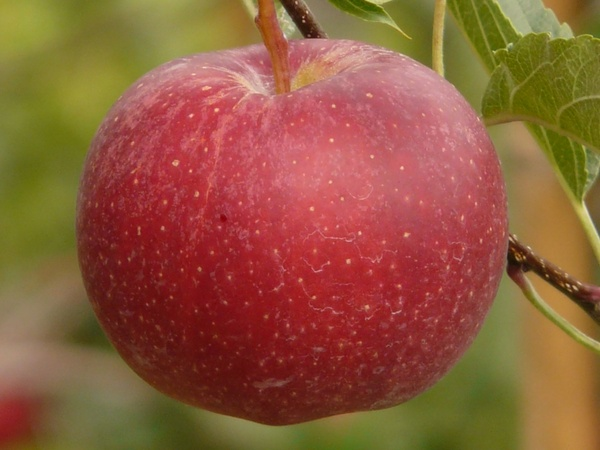

1/1 [==============================] - 2s 2s/step
[0.6650333  0.08171753 0.05139643 0.11855201 0.0833008 ]


'apple'

In [ ]:
alma = load_and_prep_image('alma.jpg')
display(Image('alma.jpg', width=300))
pred = model.predict(alma).flatten()
print(pred)
im_class = tf.argmax(pred, axis=-1)
labels[im_class]

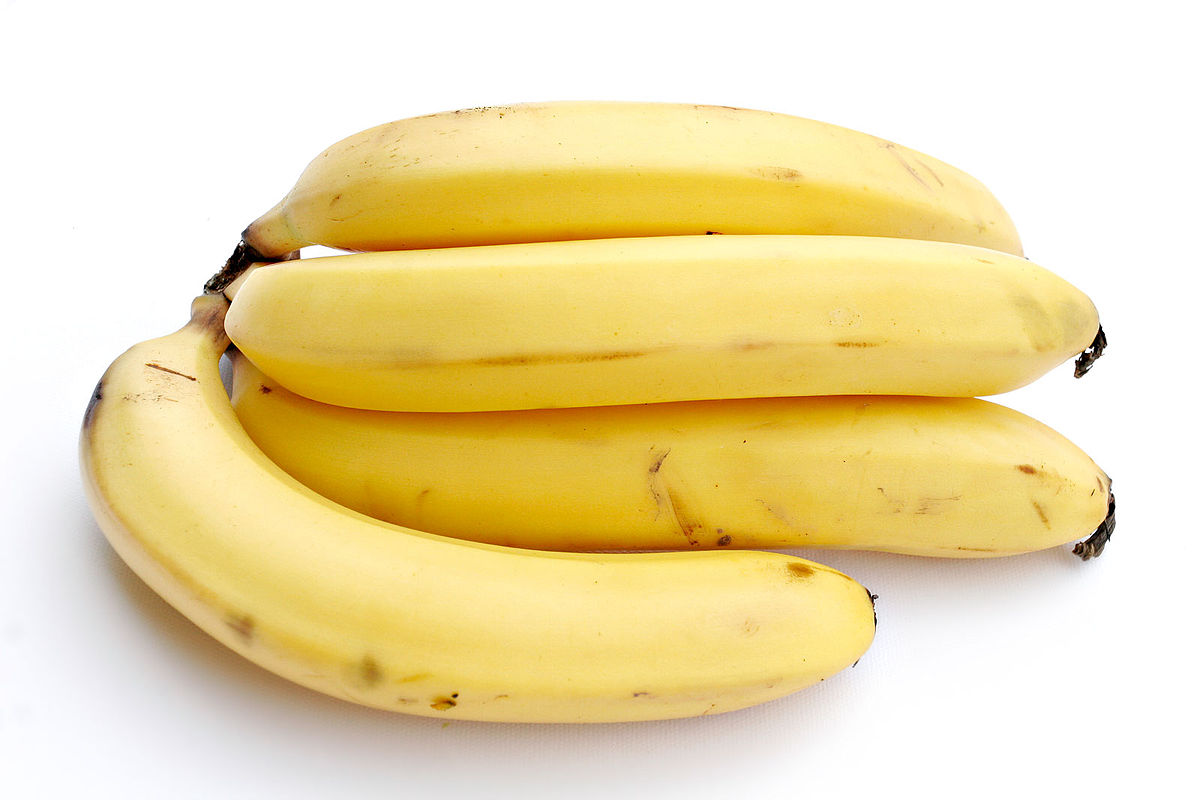

1/1 [==============================] - 0s 96ms/step


'banana'

In [ ]:
banana = load_and_prep_image('banán.jpg')
display(Image('banán.jpg', width=300))
pred = model.predict(banana).flatten()
pred
im_class = tf.argmax(pred, axis=-1)
labels[im_class]

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.3 MB/s 
     |████████████████████████████████| 106 kB 51.9 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 272 kB 51.6 MB/s 
     |████████████████████████████████| 213 kB 32.6 MB/s 
     |████████████████████████████████| 2.3 MB 45.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 68 kB 6.3 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 856 kB 37.7 MB/s 
     |████████████████████████████████| 593 kB 66

In [ ]:
import gradio as gr

gr.Interface(
    fn=classify_image, 
    inputs=gr.Image(shape=(224, 224)),
    outputs=gr.Label(num_top_classes=3)
    ).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://931b8050169cd38c.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f3ee4863110>,
 'http://127.0.0.1:7860/',
 'https://931b8050169cd38c.gradio.app')

In [ ]:
img = tf.keras.preprocessing.image.load_img('alma.jpg', target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)

inp = img.reshape((-1, 224, 224, 3))
#inp = imagenet_convert(inp)
inp = inp/255.
prediction = model.predict(inp).flatten()
confidences = {labels[i]: prediction[i] for i in range(5)}

#pred = classify_image(img)

1/1 [==============================] - 0s 197ms/step


In [ ]:
confidences

{'apple': 0.6693958,
 'banana': 0.08091313,
 'kiwi': 0.05237762,
 'orange': 0.11773682,
 'watermalon': 0.07957657}

In [ ]:
prediction

array([0.6693958 , 0.08091313, 0.05237762, 0.11773682, 0.07957657],
      dtype=float32)

In [ ]:
import requests

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels2 = response.text.split("\n")
